# Loading data

We provide a simple guide in how to load your own data and initialize the adata object for downstream analysis. This tutorial assumes that the files are either in txt or mtx format. After running this pipeline, please see the folder test_data for how exactly each data is stored.

For how to convert the clonal barcode fastq file into cell-by-clone matrix or other formats, please consult https://github.com/AllonKleinLab/LARRY

In [1]:
import cospar as cs
import pandas as pd
import scipy.io as sio
import numpy as np

In [2]:
cs.logging.print_version()

Running cospar 0.1.7 (python 3.6.13) on 2021-05-31 23:02.


Download raw data

In [3]:
cs.settings.data_path='test_data' # This name should be exactly 'text_data' 
cs.datasets.raw_data_for_import_exercise()

## Import method A
Assuming that the X_clone data is stored in mtx format

In [4]:
df_cell_id=pd.read_csv(f'{cs.settings.data_path}/cell_id.txt')
df_cell_id.head()

,Cell_ID
0,cell_10
1,cell_13
2,cell_18
3,cell_32
4,cell_70


In [5]:
df_gene=pd.read_csv(f'{cs.settings.data_path}/gene_names.txt')
df_gene.head()

,gene_names
0,0610009L18Rik
1,0610037L13Rik
2,1110012L19Rik
3,1110020A21Rik
4,1110028F11Rik


In [6]:
df_time=pd.read_csv(f'{cs.settings.data_path}/time_info.txt')
df_time.head()

,time_info
0,6
1,6
2,6
3,6
4,6


In [7]:
RNA_count_matrix=sio.mmread(f'{cs.settings.data_path}/gene_expression_count_matrx.mtx')
RNA_count_matrix

<781x2481 sparse matrix of type '<class 'numpy.float64'>'
	with 225001 stored elements in COOrdinate format>

In [8]:
X_clone=sio.mmread(f'{cs.settings.data_path}/cell_by_clone_matrx.mtx')
X_clone

<781x339 sparse matrix of type '<class 'numpy.int64'>'
	with 781 stored elements in COOrdinate format>

In [9]:
df_state=pd.read_csv(f'{cs.settings.data_path}/state_info.txt')
df_state.head()

,state_info
0,Neutrophil
1,Baso
2,Monocyte
3,Monocyte
4,Baso


In [10]:
df_X_emb=pd.read_csv(f'{cs.settings.data_path}/embedding.txt')
df_X_emb.head()

,x,y
0,1165.708,-2077.047
1,-980.871,-2055.629
2,2952.953,281.797
3,1314.821,-560.760
4,-1067.502,-1275.488


In [11]:
X_emb=np.array([df_X_emb['x'],df_X_emb['y']]).T

Now, initialize the adata object

In [12]:
adata_orig=cs.pp.initialize_adata_object(X_state=RNA_count_matrix,
    gene_names=df_gene['gene_names'],cell_names=df_cell_id['Cell_ID'],
    time_info=df_time['time_info'],X_clone=X_clone,
    state_info=df_state['state_info'], X_emb=X_emb,data_des='my_data')

Create new anndata object
Time points with clonal info: ['2' '4' '6']


In [13]:
adata_orig

AnnData object with n_obs × n_vars = 781 × 2481
    obs: 'time_info', 'state_info'
    uns: 'data_des', 'time_ordering', 'clonal_time_points'
    obsm: 'X_clone', 'X_emb'

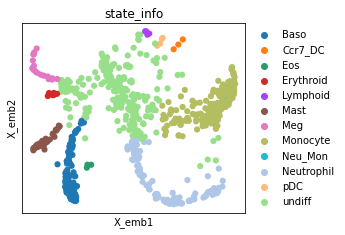

<Figure size 432x288 with 0 Axes>

In [14]:
cs.pl.embedding(adata_orig,color='state_info')

## Import method B
Assuming that the X_clone data is stored in a (cell_id, barcode_id) format

First, initialize the adata without concerning the clonal data

In [15]:
df_cell_id=pd.read_csv(f'{cs.settings.data_path}/cell_id.txt')
df_gene=pd.read_csv(f'{cs.settings.data_path}/gene_names.txt')
df_time=pd.read_csv(f'{cs.settings.data_path}/time_info.txt')
RNA_count_matrix=sio.mmread(f'{cs.settings.data_path}/gene_expression_count_matrx.mtx')
df_state=pd.read_csv(f'{cs.settings.data_path}/state_info.txt')
df_X_emb=pd.read_csv(f'{cs.settings.data_path}/embedding.txt')
X_emb=np.array([df_X_emb['x'],df_X_emb['y']]).T

In [16]:
adata_orig=cs.pp.initialize_adata_object(X_state=RNA_count_matrix,
    gene_names=df_gene['gene_names'],cell_names=df_cell_id['Cell_ID'],
    time_info=df_time['time_info'],
    state_info=df_state['state_info'], X_emb=X_emb,data_des='my_data')

Create new anndata object
Time points with clonal info: []


Now, load the clonal data. Here, we start with a table of (cell_id, clone_id) pair. The cell_id does not need to be ranked. It should match the cell_id in the ``adata_orig.obs_names``

In [17]:
df_X_clone=pd.read_csv(f'{cs.settings.data_path}/clonal_data_in_table_format.txt')
df_X_clone

,Cell_ID,Clone_ID
0,cell_0,clone_275
1,cell_1,clone_329
2,cell_2,clone_56
3,cell_3,clone_236
4,cell_4,clone_213
...,...,...
776,cell_776,clone_196
777,cell_777,clone_239
778,cell_778,clone_259
779,cell_779,clone_217


In [18]:
adata_orig.obs_names

Index(['cell_10', 'cell_13', 'cell_18', 'cell_32', 'cell_70', 'cell_80',
       'cell_90', 'cell_97', 'cell_108', 'cell_117',
       ...
       'cell_7389', 'cell_7392', 'cell_7402', 'cell_7407', 'cell_7409',
       'cell_7417', 'cell_7423', 'cell_7435', 'cell_7436', 'cell_7437'],
      dtype='object', length=781)

In [19]:
cs.pp.get_X_clone(adata_orig,df_X_clone['Cell_ID'],df_X_clone['Clone_ID'])

Total number of barcode entries: 781


In [20]:
adata_orig

AnnData object with n_obs × n_vars = 781 × 2481
    obs: 'time_info', 'state_info'
    uns: 'data_des', 'time_ordering', 'clonal_time_points', 'clone_id'
    obsm: 'X_clone', 'X_emb'

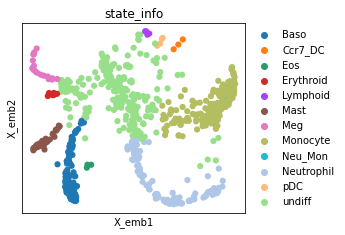

<Figure size 432x288 with 0 Axes>

In [21]:
cs.pl.embedding(adata_orig,color='state_info')